# Name : Fernando I.A.M.D.
# Index No.: 190172K

In [1]:
import cv2
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 

## Q1

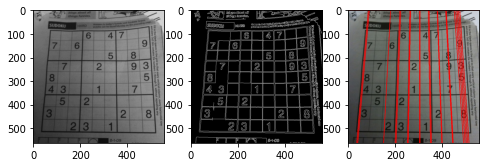

In [5]:
img = cv2.imread("sudoku.png",cv2.IMREAD_COLOR)
assert img is not None

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edged = cv2.Canny(gray,50,150,apertureSize=3)
lines = cv2.HoughLines(edged,1,np.pi/180,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho 
    x1,y1 = int(x0 + 1000*(-b)) , int (x0 + 1000*(a))
    x2,y2 = int(x0 - 1000*(-b)) , int (x0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

fig,ax = plt.subplots(1,3,figsize=(8,4))
ax[0].imshow(gray,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(edged,cmap='gray',vmin=0,vmax=255)
ax[2].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),cmap='gray',vmin=0,vmax=255)
plt.show()



## Q2

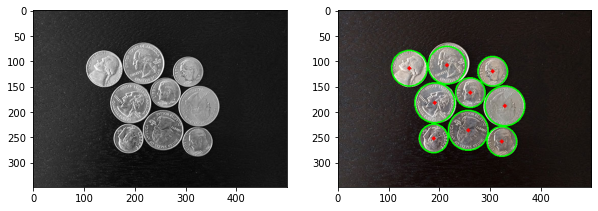

In [6]:

im = cv2.imread('coins.jpg', cv2.IMREAD_COLOR)
assert im is not None

gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,50,param1=150,param2=20,minRadius=20,maxRadius=40)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(im,(i[0],i[1]),2,(0,0,255),3)


fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()



## Q3

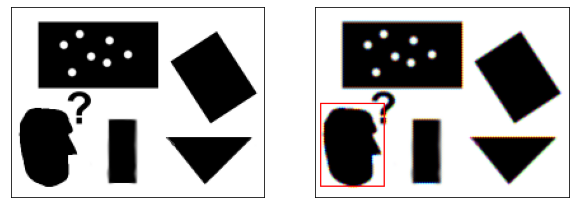

In [4]:
im = cv2.imread('pic1.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv2.imread('templ.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)

assert im is not None

im_edges = cv2.Canny(im, 50, 250)
temp1_edges = cv2.Canny(temp1, 50, 250)
alg = cv2.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv2.cvtColor(im, cv2.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0] / 2 * scale
    halfWidth = temp1.shape[1] / 2 * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    cv2.rectangle(out,p1,p2,(0,0,255))
    
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])

plt.show()

## Q4

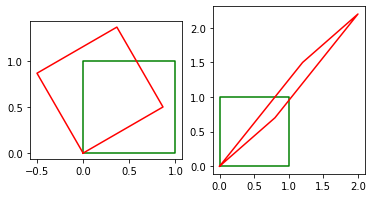

In [7]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a, b, c, d]).T

theta = np.pi/180*30
s = 1
tx, ty = 0, 0
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])
Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2 ,0.7 , 1.5 # Must form a non singular matrix
A = np.array([[a11,a12,tx], [a21,a22,ty],[0,0,1]])

Z = A @ X 

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y, color='g')
ax[0].set_aspect('equal')
ax[1].plot(x,y, color = 'g')
ax[1].set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax[0].plot(x, y, color='r')
ax[0].set_aspect('equal')

x1 = np.append(Z[0, :], Z[0,0])
y1 = np.append(Z[1, :], Z[1,0])
ax[1].plot(x1,y1, color = 'r')
ax[1].set_aspect('equal')

plt.show()

## Q5

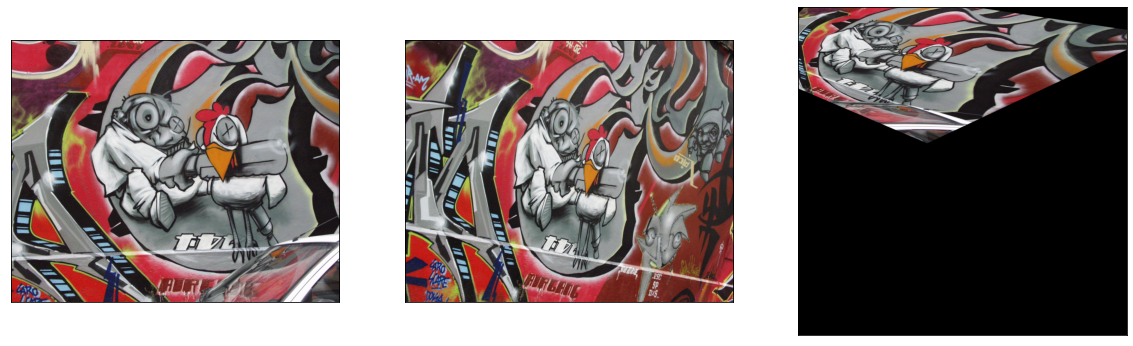

In [9]:
img1 = cv2.imread('img1.ppm',cv2.IMREAD_ANYCOLOR)
img2 = cv2.imread('img3.ppm',cv2.IMREAD_ANYCOLOR)

H = np.array( [[6.6378505e-01,   6.8003334e-01,  -3.1230335e+01],
  [-1.4495500e-01,   9.7128304e-01,   1.4877420e+02],
   [4.2518504e-04,  -1.3930359e-05,   1.0000000e+00]])

img1to4 = cv2.warpPerspective(img1,np.linalg.inv(H),(2000,2000))


fig, ax = plt.subplots(1,3,figsize= (20,10))

ax[0].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax[2].imshow(cv2.cvtColor(img1to4, cv2.COLOR_BGR2RGB))

ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()